In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:

df = pd.read_csv("student_lifestyle_dataset..csv")

In [3]:
df.head()
df.tail()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
1995,1996,6.5,0.2,7.4,2.1,7.8,Moderate,Male,8.30
1996,1997,6.3,2.8,8.8,1.5,4.6,Moderate,Female,6.62
1997,1998,6.2,0.0,6.2,0.8,10.8,Moderate,Male,7.85
1998,1999,8.1,0.7,7.6,3.5,4.1,High,Male,7.60
1999,2000,9.0,1.7,7.3,3.1,2.9,High,Male,8.95


In [4]:
print(df.describe())

        Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                       1.990100   
std     577.494589             1.423888                       1.155855   
min       1.000000             5.000000                       0.000000   
25%     500.750000             6.300000                       1.000000   
50%    1000.500000             7.400000                       2.000000   
75%    1500.250000             8.700000                       3.000000   
max    2000.000000            10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000   
50%               7.5

In [5]:
df.notnull().sum()

Student_ID                         2000
Study_Hours_Per_Day                2000
Extracurricular_Hours_Per_Day      2000
Sleep_Hours_Per_Day                2000
Social_Hours_Per_Day               2000
Physical_Activity_Hours_Per_Day    2000
Stress_Level                       2000
Gender                             2000
Grades                             2000
dtype: int64

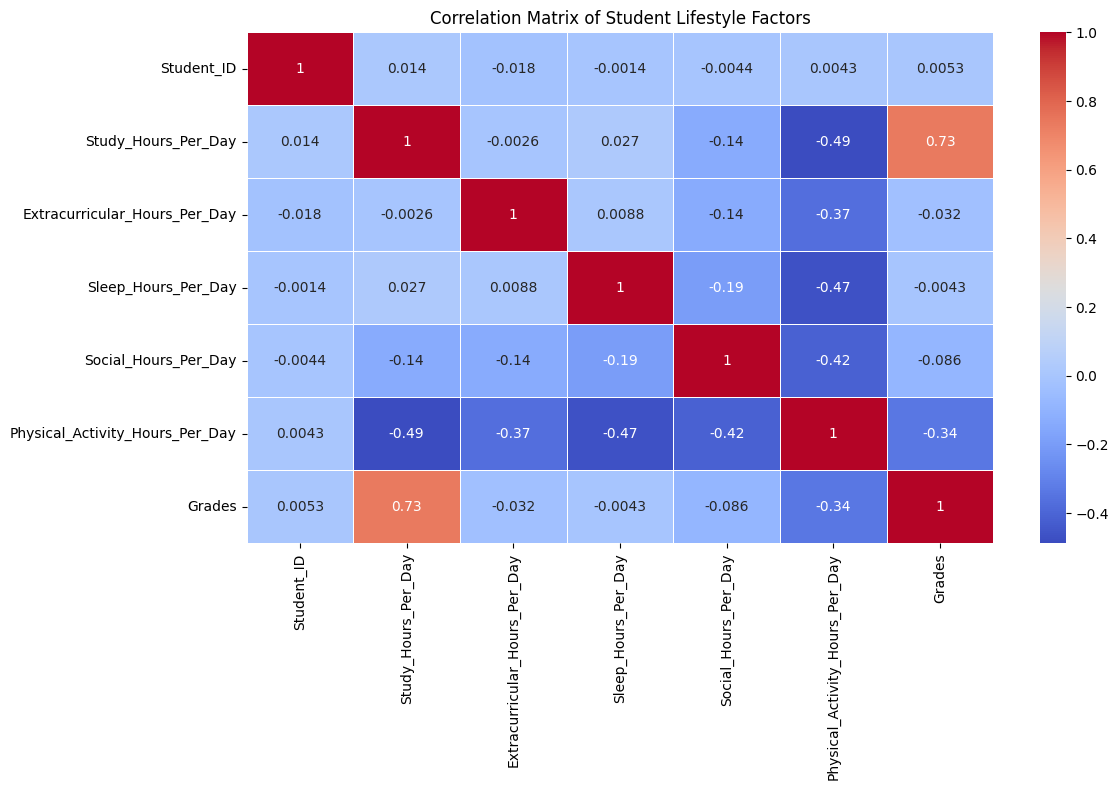

In [6]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Student Lifestyle Factors')
plt.tight_layout() 
plt.show()

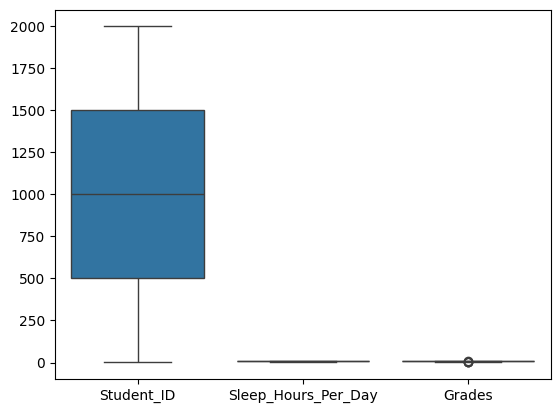

In [7]:
sns.boxplot(data=df[['Student_ID', 'Sleep_Hours_Per_Day', 'Grades']])
plt.show() 

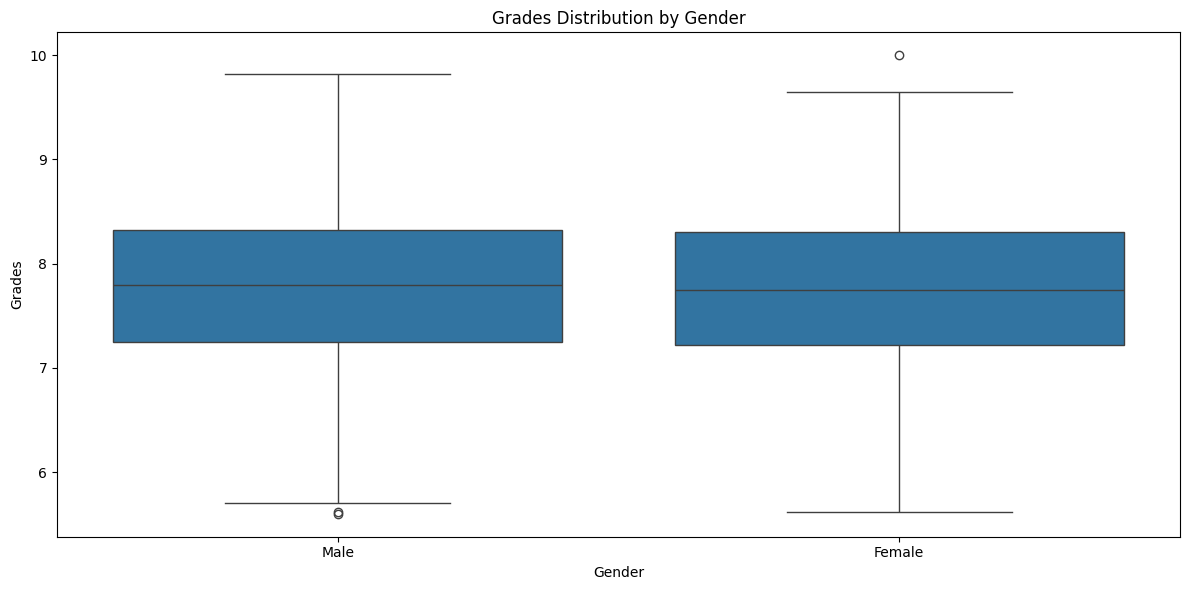

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Grades', data=df)
plt.title('Grades Distribution by Gender')
plt.tight_layout()
plt.show()

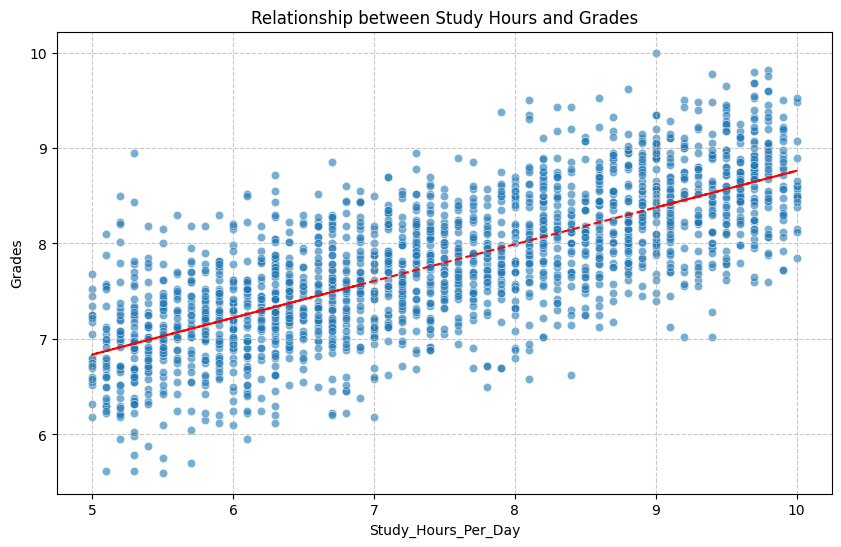

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours_Per_Day', y='Grades', data=df, alpha=0.6)
plt.title('Relationship between Study Hours and Grades')
plt.grid(True, linestyle='--', alpha=0.7)
z = np.polyfit(df['Study_Hours_Per_Day'], df['Grades'], 1)
p = np.poly1d(z)
plt.plot(df['Study_Hours_Per_Day'], p(df['Study_Hours_Per_Day']), "r--")
plt.show()


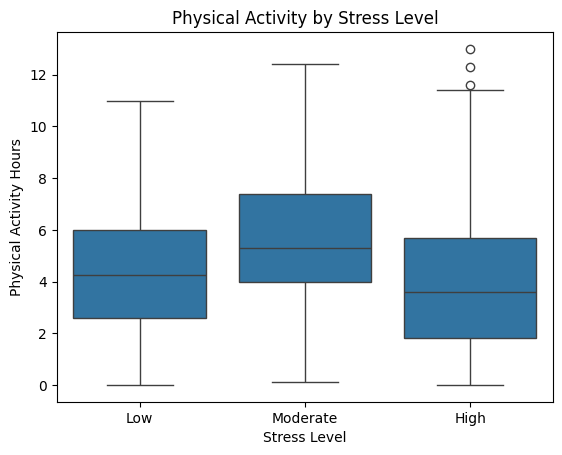

In [10]:
sns.boxplot(x='Stress_Level', y='Physical_Activity_Hours_Per_Day', data=df)
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Moderate', 'High'])
plt.title('Physical Activity by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Physical Activity Hours')
plt.show()


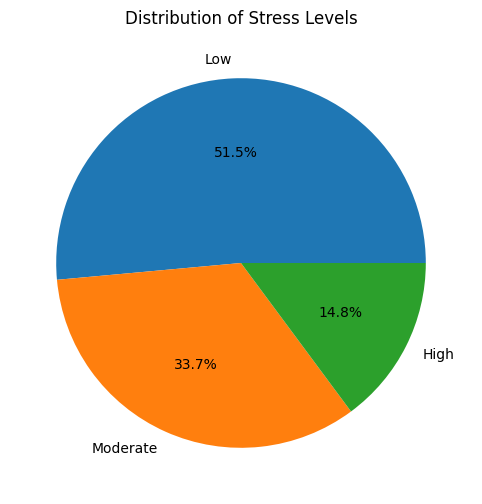

In [11]:
plt.figure(figsize=(8, 6))
df['Stress_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                      labels=['Low', 'Moderate', 'High'])
plt.title('Distribution of Stress Levels')
plt.ylabel('')
plt.show()

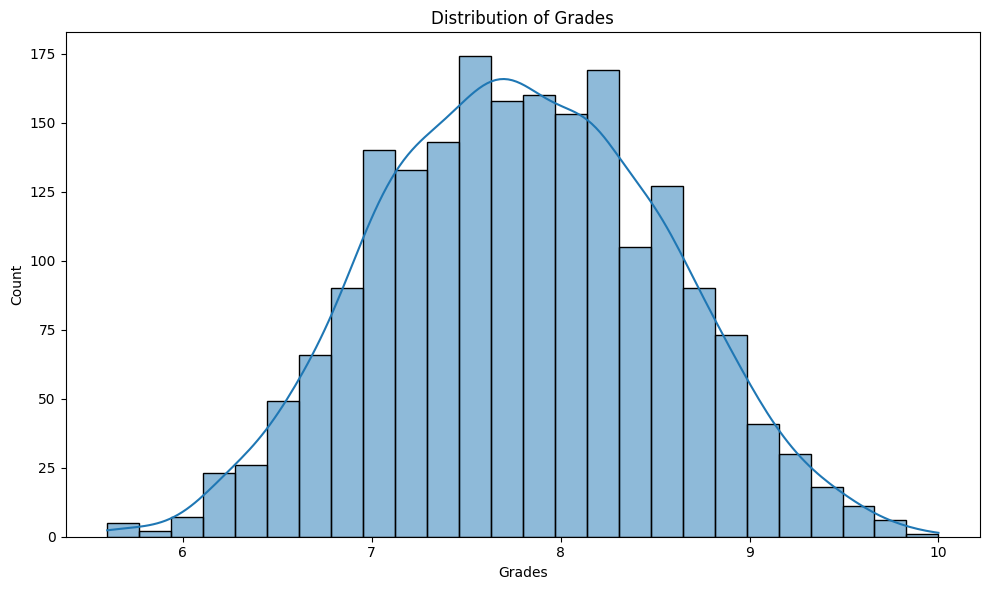

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Grades'], kde=True)
plt.title('Distribution of Grades')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 
        'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
y = df['Grades']

In [15]:
if df['Stress_Level'].dtype == 'object':
    try:
        df['Stress_Level_Numeric'] = pd.to_numeric(df['Stress_Level'])
        X['Stress_Level_Numeric'] = df['Stress_Level_Numeric']
    except:
    
        stress_dummies = pd.get_dummies(df['Stress_Level'], prefix='Stress')
        X = pd.concat([X, stress_dummies], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")


Model Evaluation:
Mean Squared Error: 0.2641632388678946
R² Score: 0.5475604360828333


In [20]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance:
                           Feature  Coefficient
0              Study_Hours_Per_Day     0.310312
6                       Stress_Low     0.027083
5                      Stress_High     0.015396
7                  Stress_Moderate    -0.042480
3             Social_Hours_Per_Day    -0.068814
4  Physical_Activity_Hours_Per_Day    -0.070540
2              Sleep_Hours_Per_Day    -0.075222
1    Extracurricular_Hours_Per_Day    -0.095736


In [21]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance:
                           Feature  Coefficient
0              Study_Hours_Per_Day     0.310312
6                       Stress_Low     0.027083
5                      Stress_High     0.015396
7                  Stress_Moderate    -0.042480
3             Social_Hours_Per_Day    -0.068814
4  Physical_Activity_Hours_Per_Day    -0.070540
2              Sleep_Hours_Per_Day    -0.075222
1    Extracurricular_Hours_Per_Day    -0.095736


In [22]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance:
                           Feature  Coefficient
0              Study_Hours_Per_Day     0.310312
6                       Stress_Low     0.027083
5                      Stress_High     0.015396
7                  Stress_Moderate    -0.042480
3             Social_Hours_Per_Day    -0.068814
4  Physical_Activity_Hours_Per_Day    -0.070540
2              Sleep_Hours_Per_Day    -0.075222
1    Extracurricular_Hours_Per_Day    -0.095736


In [23]:
X = df[['Sleep_Hours_Per_Day', 'Grades']] 
y = df['Grades']  

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [29]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = rf.predict(X_test)


In [31]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8.380185000000358e-05
